<br><font size=8 color='darkgreen'><u>Image Classification Using KNN</u></font>

# <font color='navy'>Problem Statement:</font>

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each training and test example is assigned to one of the following labels:

- <font color='navy'>0 T-shirt/top</font>
- <font color='navy'>1 Trouser</font>
- <font color='navy'>2 Pullover</font>
- <font color='navy'>3 Dress</font>
- <font color='navy'>4 Coat</font>
- <font color='navy'>5 Sandal</font>
- <font color='navy'>6 Shirt</font>
- <font color='navy'>7 Sneaker</font>
- <font color='navy'>8 Bag</font>
- <font color='navy'>9 Ankle boot</font>

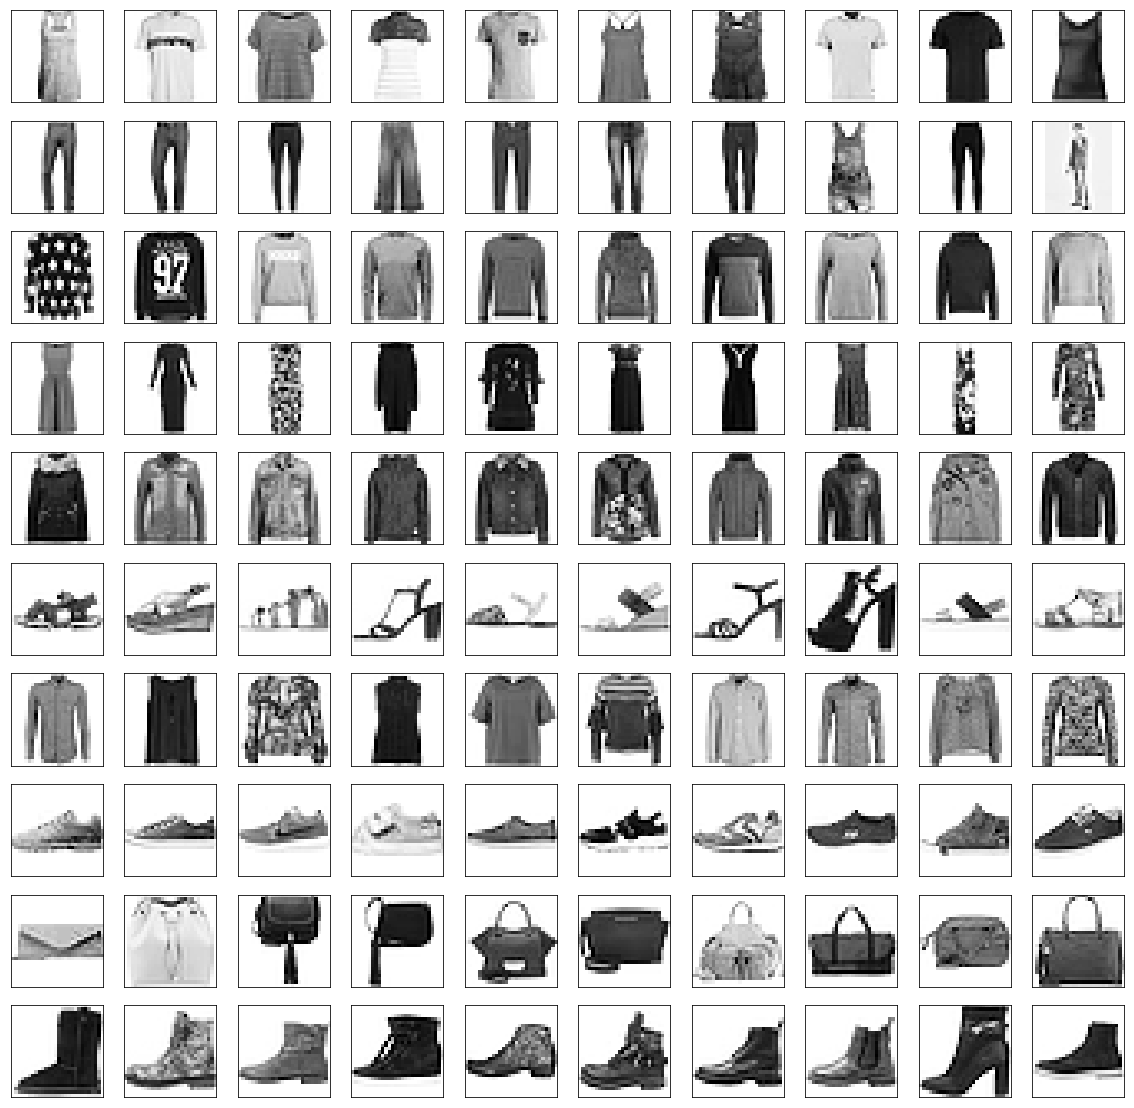

In the csv file of both train and test set
- Each row is a separate image<br>
- Column 1 is the class label<br>
- Remaining columns are pixel numbers (784 total)<br>
- Each value is the darkness of the pixel (1 to 255)<br>

<b>Aim:</b> To build a classification model using KNN algorithm to identify correct labels based on the images

# <font color='navy'><u>Performing EDA</u></font>

In [1]:
#importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data csv and converting it into a dataframe
df=pd.read_csv('fashion-mnist_train.csv')

# quick peek into the dataframe
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# checking the datatypes in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


The whole dataset contains only int64 datatype and there are no strings or objects. No need for any datatype conversions.

In [4]:
# checking for null-values
df.isnull().sum().sum()

0

There are no nulls in this dataframe

In [5]:
# checking the number of duplicated images
df.duplicated().sum()

43

In [6]:
# dropping the above 43 duplicated images
df.drop_duplicates(inplace=True)
df.shape

(59957, 785)

# <font color='navy'><u>Target Variable</u></font>

It is clearly stated that <b>label</b> is the <b>target variable</b> here. Let us analyse the <b>target variable</b>.

In [7]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

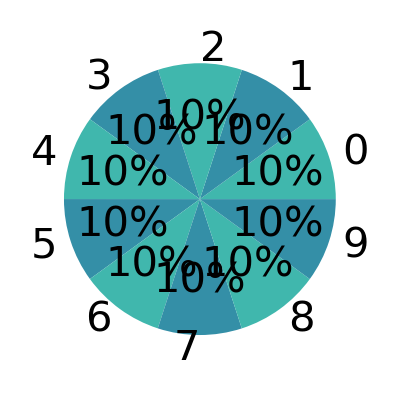

In [85]:
# lets now analyze the labels and their corresponding numbers
plt.figure(figsize=(3,1.5),dpi=300)
colors = sns.color_palette('mako_r')[1:3]
plt.pie(x=df.groupby(['label']).count()['pixel1'],labels=df.groupby(['label']).count().index, autopct='%1.0f%%', colors=colors);

We have <b>10 different categories</b> of clothing which are <b>integer encoded</b> <font color='grey'>(refer to data dictionary for the true labels)</font>. The dataset is quite balanced with almost equal representation from different categories. <font color='grey'>Note that the above diagram gives only approximate value, when we check the actual numbers using value_counts() method we can see very minor difference in the distribution</font>

# <font color='navy'><u>Data Preprocessing & Making Pipeline</u></font>

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Creating X and y variables
X=df.drop('label',axis=1)
y=df.label

In [11]:
# instantiating normalizer object
normalize=MinMaxScaler()

Here we are creating different models for different values of K, in order to find the optimal value of K using elbow graph

In [12]:
test_error_rate=[]
train_error_rate=[]

for k in range(1,31):
    
    # creating a KNN model with K
    knn=KNeighborsClassifier(k)
    
    # sequence of operations to be performed
    operations=[('normalize',normalize),('knn',knn)]
    
    # creating a pipeline
    pipe=Pipeline(steps=operations)
    
    # performing 5-fold cross validation using the pipeline and df
    cross_dict=cross_validate(pipe,X,y,cv=5,scoring='accuracy', return_train_score=True)
    
    # capturing train and test error rate for elbow graph
    test_error_rate.append(cross_dict['test_score'].mean())
    train_error_rate.append(cross_dict['train_score'].mean())

In [28]:
train_error_rate=[1-acc for acc in train_error_rate]
test_error_rate=[1-acc for acc in test_error_rate]

Plotting the elbow-graph to figure the optimal value K

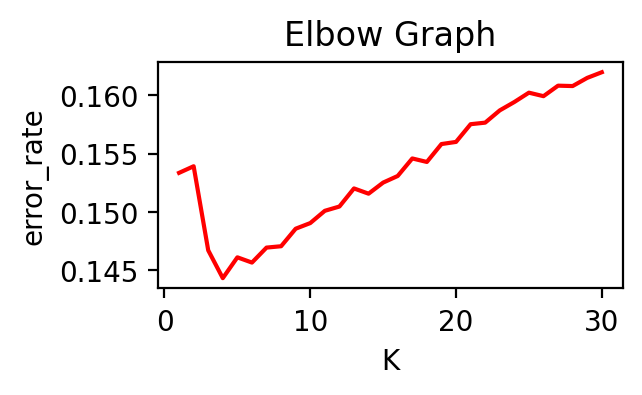

In [84]:
plt.figure(figsize=(3,1.5),dpi=200)
plt.title('Elbow Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x=range(1,31),y=test_error_rate, color='red');

From the above elbow graph we see that the test error rate is lowest when <b>K=4</b>. Let us now build our final model using this value of <b>K</b> and then obtain the <b>confusion matrix</b> and complete <b>classification report</b> for both the training set <font color='grey'>(here the entire df is the training set)</font> and the testing set <font color='grey'>(which is a totally unseen dataset, yet to be imported)</font>.

# <font color='darkgreen'>Building Final Model: knn</font>

In [42]:
# instantiating a knn object with K=4
knn=KNeighborsClassifier(n_neighbors=4)

In [43]:
# normalizing the predictors
X_norm=normalize.fit_transform(X)

In [44]:
# fitting the transformed data on the above KNeighborsClassifier object
knn.fit(X_norm,y)

KNeighborsClassifier(n_neighbors=4)

In [45]:
# making predictions off of the dataset using the above KNN model
y_pred=knn.predict(X_norm)
y_pred

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

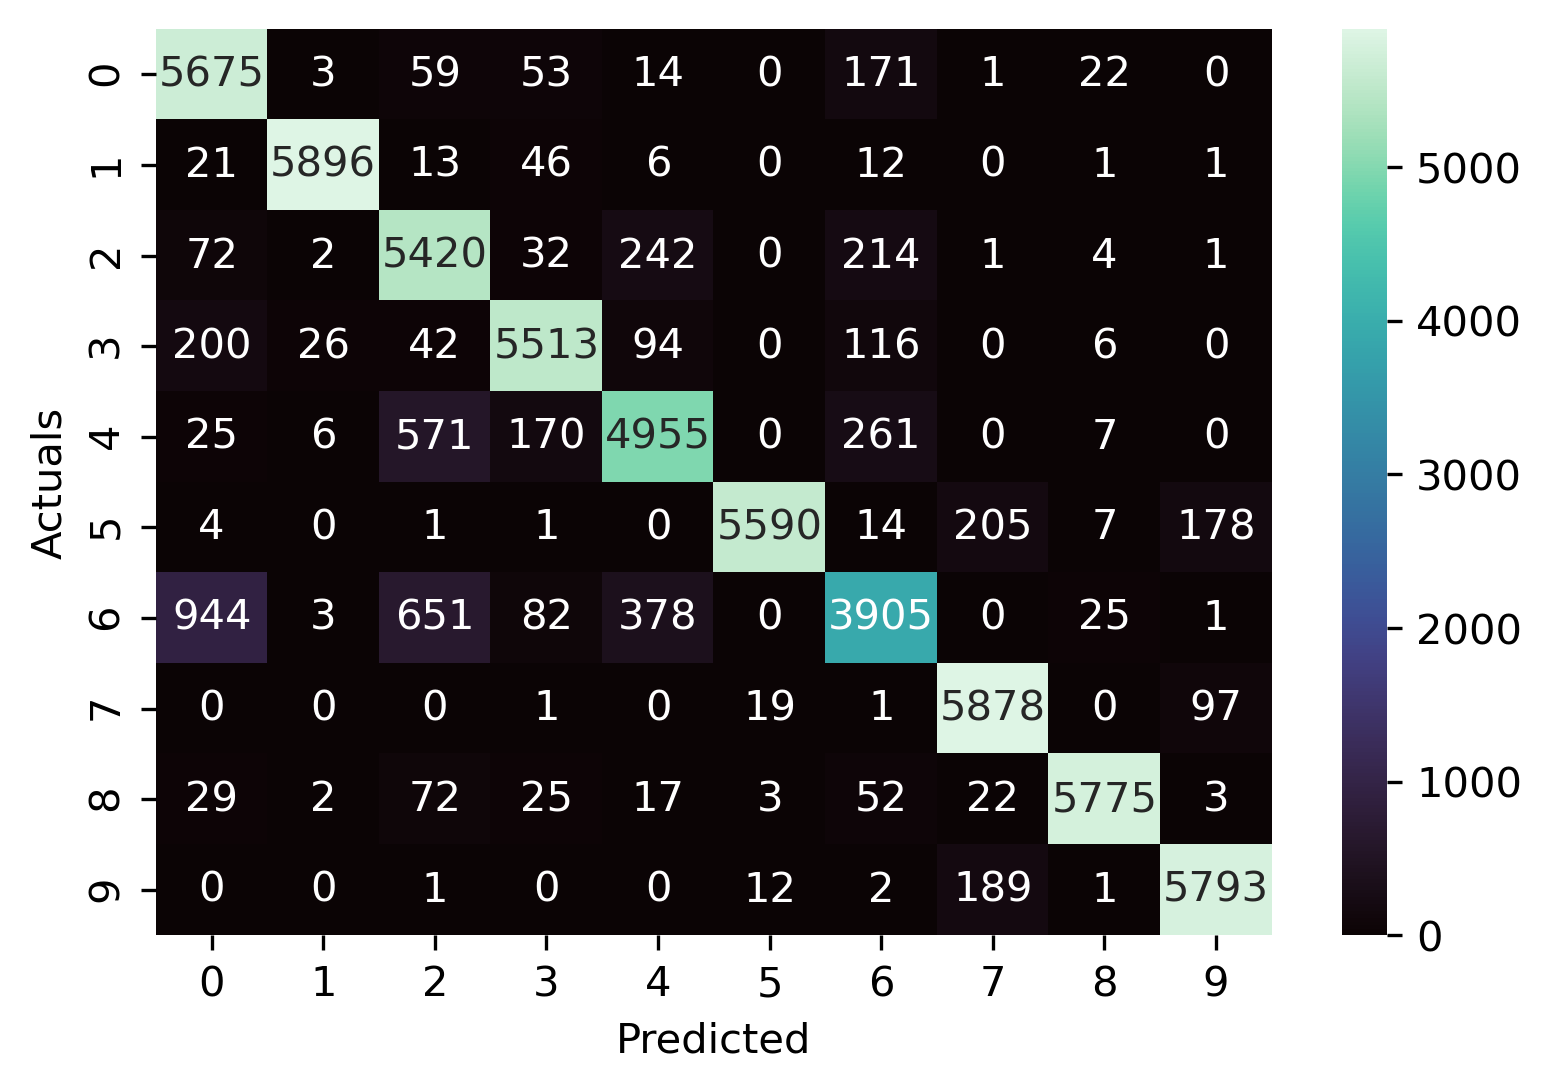

In [49]:
# creating confusion matrix for this training set
plt.figure(dpi=300)
sns.heatmap(confusion_matrix(y,y_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

From the above heatmap, we can see that the <b><font color='darkgreen'>label 6</font></b> which denotes <b><font color='darkgreen'>Shirt</font></b> suffers the highest number of misclassifications followed by <b><font color='darkgreen'>label 4</font></b> which denotes <b><font color='darkgreen'>Coat</font></b>.

<b><font color='darkgreen'>label 6 (Shirt)</font></b> is misclassified as <font color='lightgrey'>(in decreasing order)</font> <b><font color='darkgreen'>label 0 (Tshirt/top)</font></b>, <b><font color='darkgreen'>label 2 (Pullover)</font></b> and <b><font color='darkgreen'>label 4 (Coat)</font></b>. This is a type of mistake which humans may commit when all we have is a low pixel image dataset.

The same argument goes for <b><font color='darkgreen'>label 4 (Coat)</font></b> being misclassified as <b><font color='darkgreen'>label 2 (Pullover)</font></b> and <b><font color='darkgreen'>label 6 (Shirt)</font></b>.

Though there's a significant number of misclassifications, compared to the size of the dataset, it is quite small and reasonable. Let us view the complete <b>classification report</b> to further understand the quality of the prediction.

In [58]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      5998
           1       0.99      0.98      0.99      5996
           2       0.79      0.91      0.85      5988
           3       0.93      0.92      0.92      5997
           4       0.87      0.83      0.85      5995
           5       0.99      0.93      0.96      6000
           6       0.82      0.65      0.73      5989
           7       0.93      0.98      0.96      5996
           8       0.99      0.96      0.97      6000
           9       0.95      0.97      0.96      5998

    accuracy                           0.91     59957
   macro avg       0.91      0.91      0.91     59957
weighted avg       0.91      0.91      0.91     59957



All the important metrics such as <b>precision</b>, <b>recall</b> and <b>f1-score</b> both class-wise and global are pretty high

In [68]:
# computing the exact accuracy_score
train_accuracy=round(100*accuracy_score(y,y_pred),2)
print(f'The train accuracy score is {train_accuracy}%')

The train accuracy score is 90.73%


Here we are loading the unseen <b>testing set</b> to make inference using the above <b>knn</b> model

In [69]:
#reading the data csv and converting it into a dataframe
df_test=pd.read_csv('fashion-mnist_test.csv')

#quick peek into the dataframe
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# checking the datatypes in this dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


The whole dataset contains only int64 datatype and there are no strings or objects. No need for any datatype conversions.

In [71]:
# checking for null-values
df_test.isnull().sum().sum()

0

There are no nulls in this dataframe

In [72]:
# splitting the testing set into predictor and target variables
X_test=df_test.drop('label',axis=1)
y_test=df_test.label

In [73]:
# normalizing the predictors using the same scaling object. We're applying only transform here.
X_test_norm=normalize.transform(X_test)

In [77]:
# making predictions off of the testing data using the same knn model
y_test_pred=knn.predict(X_test_norm)
y_test_pred

array([0, 1, 2, ..., 8, 8, 2], dtype=int64)

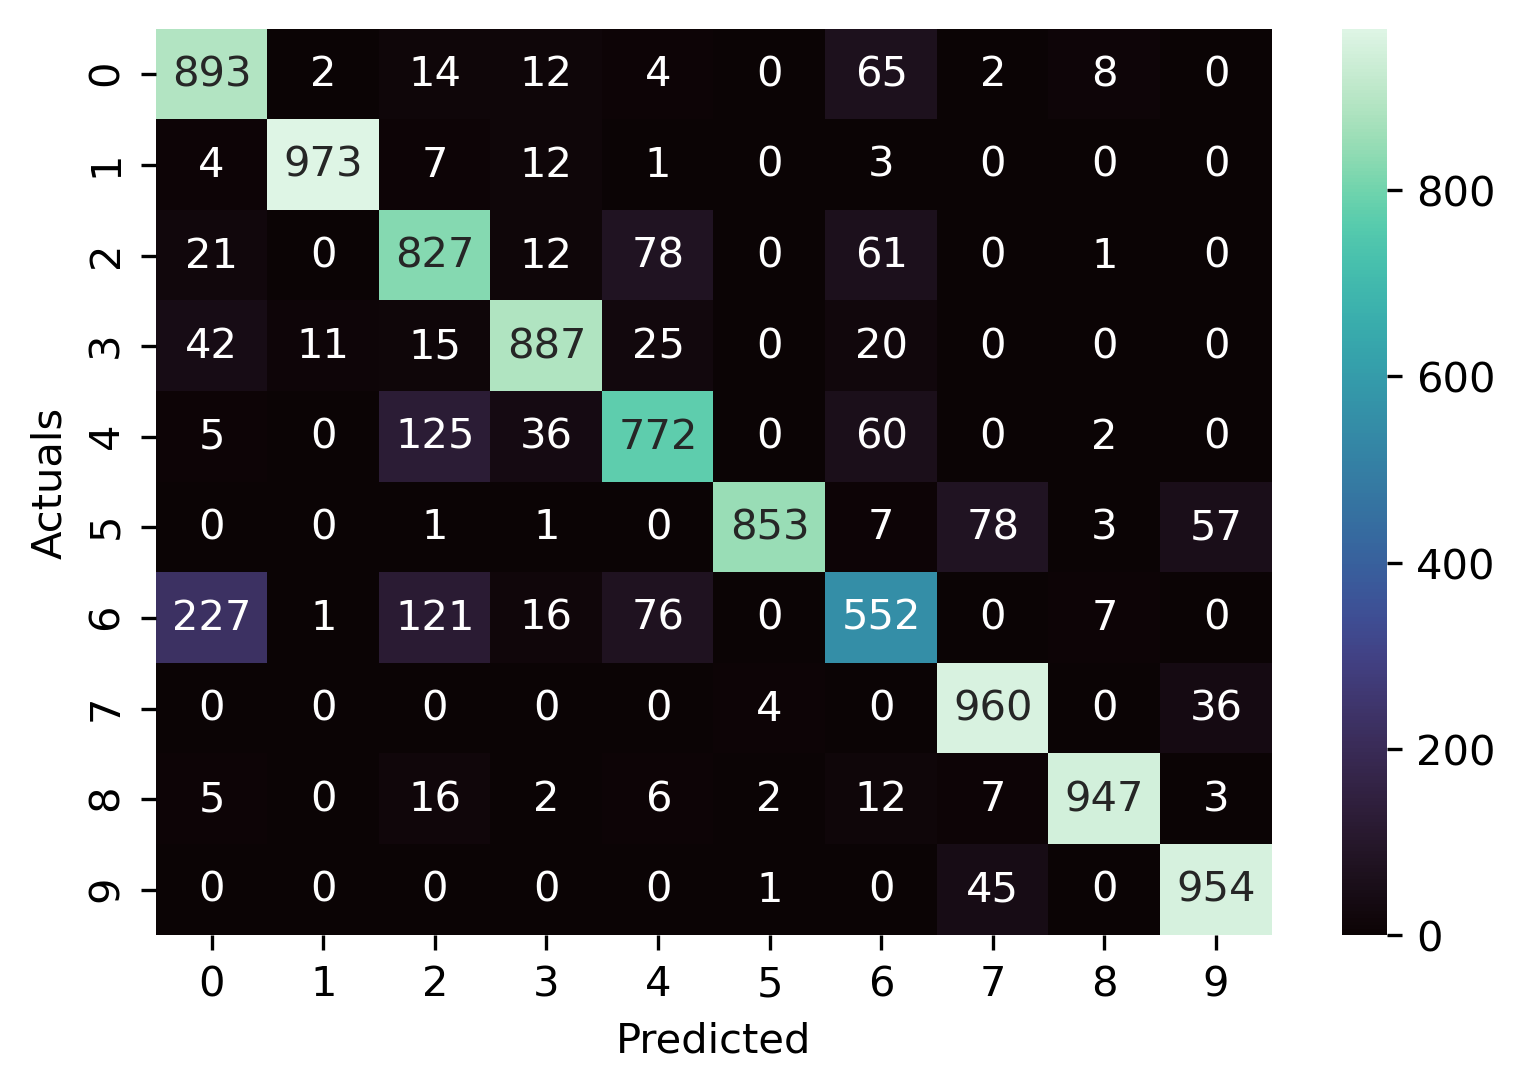

In [75]:
# creating confusion matrix for this testing set
plt.figure(dpi=300)
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');

Exactly like in the case of training set, we can see that the <b><font color='darkgreen'>label 6</font></b> which denotes <b><font color='darkgreen'>Shirt</font></b> suffers the highest number of misclassifications followed by <b><font color='darkgreen'>label 4</font></b> which denotes <b><font color='darkgreen'>Coat</font></b>. The reasons for these misclassifications are already explained in the heatmap of the training set classification itself.

Though there's a significant number of misclassifications, compared to the size of the dataset, it is quite small and reasonable. Let us view the complete <b>classification report</b> to further understand the quality of the prediction.

In [78]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.83      0.78      1000
           3       0.91      0.89      0.90      1000
           4       0.80      0.77      0.79      1000
           5       0.99      0.85      0.92      1000
           6       0.71      0.55      0.62      1000
           7       0.88      0.96      0.92      1000
           8       0.98      0.95      0.96      1000
           9       0.91      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



All the important metrics such as <b>precision</b>, <b>recall</b> and <b>f1-score</b> both class-wise and global are reasonably high

In [79]:
# computing the exact accuracy_score
test_accuracy=round(100*accuracy_score(y_test,y_test_pred),2)
print(f'The test accuracy score is {test_accuracy}%')

The test accuracy score is 86.18%


# <font color='darkviolet'>knn Final Model Performance:</font>
<font color='darkviolet'><b>train_accuracy = 90.73%</b></font><br>
<font color='darkviolet'><b>test_accuracy = 86.18%</b></font>

There's a small dip in the <b>accuracy_score</b> of the testing set compared to that of the training set, but the difference is within the acceptable range, which implies that our <b>KNeighborsClassifier model <font color='darkgreen'>knn</font></b> is generalizing well to the unseen data. 